In [1]:
pip install fastapi uvicorn


Note: you may need to restart the kernel to use updated packages.


In [97]:
import pyodbc
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix

In [46]:
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=LAPTOP-Q5CNA3P4\SQLEXPRESS;DATABASE=LogisticsData;Trusted_Connection=yes;')
# query Data RouteID,TotalTravelTime, TotalDistanceKM, AverageSpeedKMH,TotalPackages,TotalPackageDensity,AverageServiceTimePerStop,TimeWindowCompliance, StopDensity,RouteScore, InvalidSequenceScoreFROM RouteSummary
query = """
SELECT * 
FROM RouteSummary
"""
data = pd.read_sql(query, conn)

In [47]:
from sklearn.preprocessing import LabelEncoder

# Creating Label Encoder Objects
label_encoder = LabelEncoder()

# Application Label Encoders
data['RouteScore'] = label_encoder.fit_transform(data['RouteScore'])



In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RouteID                    936 non-null    object 
 1   TotalTravelTime            936 non-null    float64
 2   TotalDistanceKM            936 non-null    float64
 3   AverageSpeedKMH            936 non-null    float64
 4   AvgPackagesPerStop         936 non-null    int64  
 5   TotalPackages              936 non-null    int64  
 6   TotalPackageDensity        936 non-null    float64
 7   TimeWindowCompliance       936 non-null    float64
 8   InvalidSequenceScore       936 non-null    float64
 9   TotalServiceTime           936 non-null    int64  
 10  ServiceTimeRatio           936 non-null    float64
 11  RouteScore                 936 non-null    int32  
 12  DeliverySuccessRate        936 non-null    float64
 13  AverageServiceTimePerStop  936 non-null    float64

In [49]:
data.head()

,RouteID,TotalTravelTime,TotalDistanceKM,AverageSpeedKMH,AvgPackagesPerStop,TotalPackages,TotalPackageDensity,TimeWindowCompliance,InvalidSequenceScore,TotalServiceTime,ServiceTimeRatio,RouteScore,DeliverySuccessRate,AverageServiceTimePerStop,StopDensity
0,RouteID_0ea7aa41-f026-4aee-8379-8099b94aff6b,5754297.2,3.156866e+07,19749.966622,2,271,0.003140,0.121771,0.799243,10121,0.001759,0,0.996310,71.0,0.000004
1,RouteID_134a45cc-2f4c-4b53-b07c-6300e3e917dd,19292952.1,5.041548e+07,9407.359562,1,205,0.003002,0.004878,1.158991,9360,0.000485,2,1.000000,53.0,0.000003
2,RouteID_2c07b5c7-d405-4d75-a17d-e4d770df9162,12416521.4,5.851275e+07,16964.969401,1,271,0.003090,0.022140,1.326094,14556,0.001172,2,1.000000,73.0,0.000003
3,RouteID_30da62e8-2411-4b93-a707-6f7e2ad804b3,9644640.6,4.770270e+07,17805.713981,2,281,0.003486,0.000000,1.008701,13999,0.001451,0,0.996441,80.0,0.000004
4,RouteID_39d215ce-02d3-4ca7-9d73-1c6567d5dda8,3451812.6,1.685937e+07,17583.143539,3,283,0.002888,0.084806,0.685309,10317,0.002989,0,0.992933,93.0,0.000007


In [50]:
# Check for NaN values
print(data.isnull().sum())

#Fill NaN values (here is an example of filling mean values)
data.fillna(data.mean(), inplace=True)

RouteID                      0
TotalTravelTime              0
TotalDistanceKM              0
AverageSpeedKMH              0
AvgPackagesPerStop           0
TotalPackages                0
TotalPackageDensity          0
TimeWindowCompliance         0
InvalidSequenceScore         0
TotalServiceTime             0
ServiceTimeRatio             0
RouteScore                   0
DeliverySuccessRate          0
AverageServiceTimePerStop    0
StopDensity                  0
dtype: int64


                           TotalTravelTime  TotalDistanceKM  AverageSpeedKMH  \
TotalTravelTime                   1.000000         0.847381        -0.681620   
TotalDistanceKM                   0.847381         1.000000        -0.311134   
AverageSpeedKMH                  -0.681620        -0.311134         1.000000   
AvgPackagesPerStop               -0.650895        -0.587689         0.474728   
TotalPackages                     0.319106         0.543549         0.108052   
TotalPackageDensity              -0.090902        -0.123218         0.020492   
TimeWindowCompliance             -0.372479        -0.396407         0.185700   
InvalidSequenceScore              0.554861         0.527532        -0.439290   
TotalServiceTime                  0.239633         0.335989        -0.063385   
ServiceTimeRatio                 -0.683233        -0.678150         0.579611   
RouteScore                        0.223876         0.189571        -0.204310   
DeliverySuccessRate               0.2423

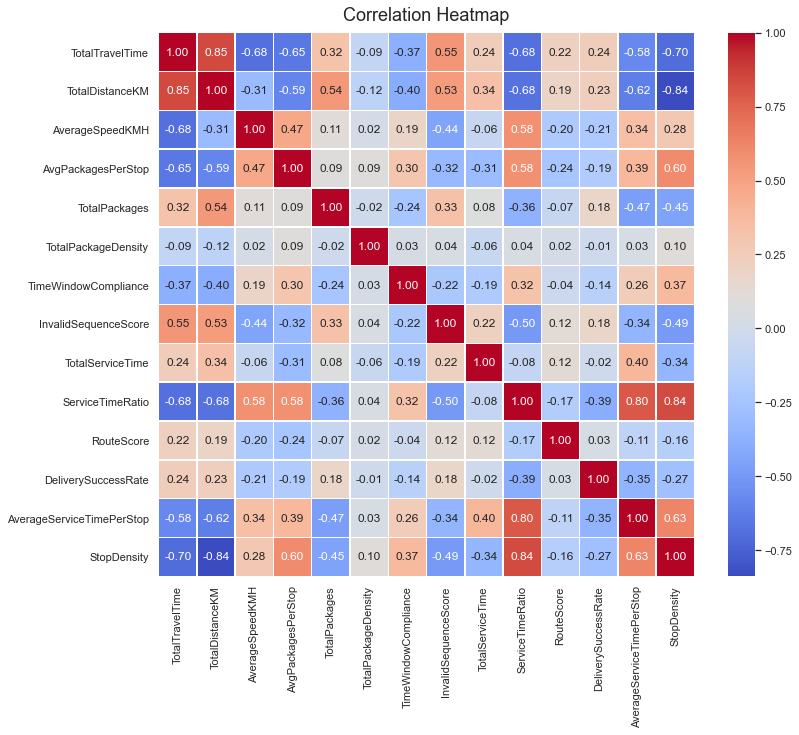

In [51]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# View Correlation Matrix
print(corr_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the drawing style
sns.set(style='white')

# Heat mapping
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

# Display heat map
plt.show()


In [53]:
# Separation of characteristics and target variables
X = data[['AverageSpeedKMH','StopDensity','AverageServiceTimePerStop','TotalPackages','TotalPackageDensity','AverageSpeedKMH', 'TimeWindowCompliance']]
y = data['InvalidSequenceScore']

# Divide the training set and test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardised features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# Calculate the correlation matrix
corrX_matrix = X.corr()
# View correlation matrix
print(corrX_matrix)

                           AverageSpeedKMH  StopDensity  \
AverageSpeedKMH                   1.000000     0.283428   
StopDensity                       0.283428     1.000000   
AverageServiceTimePerStop         0.342596     0.627945   
TotalPackages                     0.108052    -0.445510   
TotalPackageDensity               0.020492     0.098949   
AverageSpeedKMH                   1.000000     0.283428   
TimeWindowCompliance              0.185700     0.373168   

                           AverageServiceTimePerStop  TotalPackages  \
AverageSpeedKMH                             0.342596       0.108052   
StopDensity                                 0.627945      -0.445510   
AverageServiceTimePerStop                   1.000000      -0.465891   
TotalPackages                              -0.465891       1.000000   
TotalPackageDensity                         0.031886      -0.017591   
AverageSpeedKMH                             0.342596       0.108052   
TimeWindowCompliance          

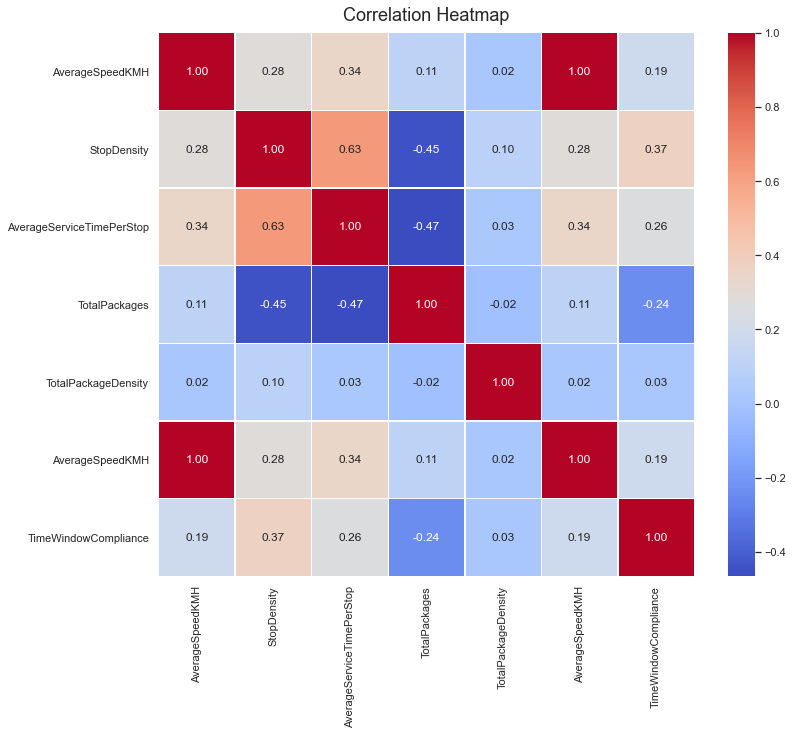

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the drawing style
sns.set(style='white')

# Heat mapping
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corrX_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

# Display heat map
plt.show()


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)

print(f"Linear Regression CV Scores: {lr_scores.mean()}")


Linear Regression CV Scores: 0.3770714309383538


In [57]:
# Use 10 fold cross validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='r2')
print("Linear Regression 10-Fold CV Scores:", cv_scores.mean())

Linear Regression 10-Fold CV Scores: 0.37304435380845036


In [58]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)

print(f"Random Forest Regression CV Scores: {rf_scores.mean()}")


Random Forest Regression CV Scores: 0.3515605805915378


In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Linear regression model assessment
y_pred_lr = lr.predict(X_test)
print(f"Linear Regression MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"Linear Regression R2: {r2_score(y_test, y_pred_lr)}")

# Random forest regression model assessment
y_pred_rf = rf.predict(X_test)
print(f"Random Forest Regression MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Random Forest Regression MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"Random Forest Regression R2: {r2_score(y_test, y_pred_rf)}")


Linear Regression MAE: 0.15779913073066337
Linear Regression MSE: 0.037572773918395655
Linear Regression R2: 0.3816167080152676
Random Forest Regression MAE: 0.16645379915303182
Random Forest Regression MSE: 0.0411258877502329
Random Forest Regression R2: 0.32313856017076514


In [106]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Instantiating a linear regression model
lr = LinearRegression()

# Instantiated recursive feature elimination
selector = RFE(estimator=lr, n_features_to_select=5, step=1)  # 选择5个最重要的特征

# fit a model (math.)
selector = selector.fit(X_train, y_train)

# Print the selected features
print("Selected features:", selector.support_)
print("Feature ranking:", selector.ranking_)


Selected features: [ True  True  True  True False  True False]
Feature ranking: [1 1 1 1 2 1 3]


In [61]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Instantiate Ridge regression
ridge = Ridge()
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='r2')
grid_search_ridge.fit(X_train, y_train)

print("Best parameters for Ridge:", grid_search_ridge.best_params_)
print("Best Ridge R2 score:", grid_search_ridge.best_score_)

# Instantiate Lasso regression
lasso = Lasso()
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='r2')
grid_search_lasso.fit(X_train, y_train)

print("Best parameters for Lasso:", grid_search_lasso.best_params_)
print("Best Lasso R2 score:", grid_search_lasso.best_score_)


Best parameters for Ridge: {'alpha': 10}
Best Ridge R2 score: 0.3779993440575441
Best parameters for Lasso: {'alpha': 0.1}
Best Lasso R2 score: 0.09184884195262352


In [62]:
from sklearn.model_selection import cross_val_score

# Best Ridge model
best_ridge = grid_search_ridge.best_estimator_
ridge_scores = cross_val_score(best_ridge, X_train, y_train, cv=5, scoring='r2')

print("Ridge Regression CV Scores:", ridge_scores.mean())

# Best Lasso model
best_lasso = grid_search_lasso.best_estimator_
lasso_scores = cross_val_score(best_lasso, X_train, y_train, cv=5, scoring='r2')

print("Lasso Regression CV Scores:", lasso_scores.mean())


Ridge Regression CV Scores: 0.3779993440575441
Lasso Regression CV Scores: 0.09184884195262352


In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the best Ridge model
y_pred_ridge = best_ridge.predict(X_test)
print(f"Ridge Regression MAE: {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"Ridge Regression MSE: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"Ridge Regression R2: {r2_score(y_test, y_pred_ridge)}")

# Evaluate the best Lasso model
y_pred_lasso = best_lasso.predict(X_test)
print(f"Lasso Regression MAE: {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"Lasso Regression MSE: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"Lasso Regression R2: {r2_score(y_test, y_pred_lasso)}")


Ridge Regression MAE: 0.1579147137398707
Ridge Regression MSE: 0.037629170029096465
Ridge Regression R2: 0.3806885249466966
Lasso Regression MAE: 0.19256546816785364
Lasso Regression MSE: 0.0544585615809888
Lasso Regression R2: 0.10370566037134654


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate random forest regression models
rf = RandomForestRegressor()

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the optimal parameters
print(grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate optimised models
y_pred_best_rf = best_rf.predict(X_test)
print(f"Optimized Random Forest Regression MAE: {mean_absolute_error(y_test, y_pred_best_rf)}")
print(f"Optimized Random Forest Regression MSE: {mean_squared_error(y_test, y_pred_best_rf)}")
print(f"Optimized Random Forest Regression R2: {r2_score(y_test, y_pred_best_rf)}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Optimized Random Forest Regression MAE: 0.1671453789782081
Optimized Random Forest Regression MSE: 0.0411608159376311
Optimized Random Forest Regression R2: 0.32256370222832875


In [64]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate and train gradient boosting regression models
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Evaluate gradient boosting regression models
y_pred_gbr = gbr.predict(X_test)
print(f"Gradient Boosting Regression MAE: {mean_absolute_error(y_test, y_pred_gbr)}")
print(f"Gradient Boosting Regression MSE: {mean_squared_error(y_test, y_pred_gbr)}")
print(f"Gradient Boosting Regression R2: {r2_score(y_test, y_pred_gbr)}")


Gradient Boosting Regression MAE: 0.1718368154165867
Gradient Boosting Regression MSE: 0.04315021211181842
Gradient Boosting Regression R2: 0.28982165986734465


In [111]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define the base model
estimators = [
    ('ridge', Ridge(alpha=grid_search_ridge.best_params_['alpha'])),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Define the portfolio model
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

# Training combinatorial models
stacking_regressor.fit(X_train, y_train)

# Evaluating Portfolio Models
y_pred_stack = stacking_regressor.predict(X_test)
print(f"Stacking Regressor MAE: {mean_absolute_error(y_test, y_pred_stack)}")
print(f"Stacking Regressor MSE: {mean_squared_error(y_test, y_pred_stack)}")
print(f"Stacking Regressor R2: {r2_score(y_test, y_pred_stack)}")

# Use 10 fold cross validation
cv_scores_stack = cross_val_score(stacking_regressor, X_train, y_train, cv=10, scoring='r2')
print("Stacking Regressor 10-Fold CV Scores:", cv_scores_stack.mean())


Stacking Regressor MAE: 0.1612732187250215
Stacking Regressor MSE: 0.03852337332069745
Stacking Regressor R2: 0.3659714754053245
Stacking Regressor 10-Fold CV Scores: 0.3932072526705293


In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import joblib

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)

# 保存堆叠回归模型
joblib.dump(stacking_regressor, 'stacking_regressor.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [113]:
from fastapi import FastAPI, HTTPException
import joblib
import numpy as np
from pydantic import BaseModel
from sklearn.preprocessing import StandardScaler

app = FastAPI()

# Load saved models and Scaler
try:
    model = joblib.load('stacking_regressor.pkl')
    scaler = joblib.load('scaler.pkl')
except Exception as e:
    print(f"Error loading model or scaler: {e}")

class PredictRequest(BaseModel):
    StopDensity: float
    AverageServiceTimePerStop: float
    TotalPackages: int
    TotalPackageDensity: float
    AverageSpeedKMH: float
    TimeWindowCompliance: float
    RouteScore: float

@app.post("/predict")
async def predict(request: PredictRequest):
    try:
        # Pre-processing input data
        input_data = np.array([
            request.StopDensity, request.AverageServiceTimePerStop, request.TotalPackages,
            request.TotalPackageDensity, request.AverageSpeedKMH, request.TimeWindowCompliance,
            request.RouteScore
        ]).reshape(1, -1)
        # Undertake standardisation
        input_data = scaler.transform(input_data)
        # Make projections
        prediction = model.predict(input_data)
        return {"InvalidSequenceScore": prediction[0]}
    except Exception as e:
        print(f"Error during prediction: {e}")
        raise HTTPException(status_code=500, detail="Prediction failed")

if __name__ == "__main__":
    import nest_asyncio
    import uvicorn
    nest_asyncio.apply()
    uvicorn.run(app, host="127.0.0.1", port=8000)


INFO:     Started server process [904]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [904]


KeyboardInterrupt: 

In [65]:
# Example of feature generation: interaction features
data['TotalServiceTime_Per_Package'] = data['TotalServiceTime'] / data['TotalPackages']
data['StopDensity_Per_AverageSpeed'] = data['StopDensity'] / data['AverageSpeedKMH']

In [73]:
from py2neo import Graph
# Connect to the Neo4j database
graph = Graph("bolt://localhost:7687", auth=("neo4j", "1234qwer"))

In [74]:
query = """
MATCH (r:Route)
RETURN r.RouteID AS RouteID, 
       r.TravelTime AS TravelTime, 
       r.DistanceKM AS DistanceKM, 
       r.AverageSpeedKMH AS AverageSpeedKMH,
       r.PackageDensity AS PackageDensity, 
       r.AvgPackagesPerStop AS AvgPackagesPerStop,
       r.ServiceTimeRatio AS ServiceTimeRatio, 
       r.TimeWindowCompliance AS TimeWindowCompliance,
       r.DeliverySuccessRate AS DeliverySuccessRate,
       r.RouteScore AS RouteScore,
       r.InvalidSequenceScore AS InvalidSequenceScore
"""

In [75]:
# Execute the query and convert the result into a DataFrame
data = graph.run(query).to_data_frame()

# Save the DataFrame as a CSV file
data.to_csv('route_data.csv', index=False)

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Load data
data = pd.read_csv('route_data.csv')

# View data
print(data.head())

                                        RouteID  TravelTime    DistanceKM  \
0  RouteID_134a45cc-2f4c-4b53-b07c-6300e3e917dd  19292952.1  5.041548e+07   
1  RouteID_2c07b5c7-d405-4d75-a17d-e4d770df9162  12416521.4  5.851275e+07   
2  RouteID_30da62e8-2411-4b93-a707-6f7e2ad804b3   9644640.6  4.770270e+07   
3  RouteID_39d215ce-02d3-4ca7-9d73-1c6567d5dda8   3451812.6  1.685937e+07   
4  RouteID_02388faf-93c8-4ce9-a5d1-62b97b4accf4  13676774.5  3.217610e+07   

   AverageSpeedKMH  PackageDensity  AvgPackagesPerStop  ServiceTimeRatio  \
0      9407.359562        0.003002                 1.0          0.000485   
1     16964.969401        0.003090                 1.0          0.001172   
2     17805.713981        0.003486                 2.0          0.001451   
3     17583.143539        0.002888                 3.0          0.002989   
4      8469.392422        0.003445                 1.0          0.000564   

   TimeWindowCompliance  DeliverySuccessRate  RouteScore  InvalidSequenceScore  

In [78]:
# Selection of characteristics and target variables
X = data.drop(columns=['RouteID','DistanceKM'])
y = data['DeliverySuccessRate']
# Initialise MinMaxScaler
scaler = MinMaxScaler()

# Standardised features
features_scaled = scaler.fit_transform(X)

# Convert normalised features to DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=X.columns)

# View standardised data
print(features_scaled_df.head())
# Delineate data sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled_df, y, test_size=0.2, random_state=42)

   TravelTime  AverageSpeedKMH  PackageDensity  AvgPackagesPerStop  \
0    0.712667         0.096594        0.296489                0.00   
1    0.453739         0.404159        0.320861                0.00   
2    0.349366         0.438374        0.430823                0.25   
3    0.116180         0.429316        0.264782                0.50   
4    0.501193         0.058422        0.419683                0.00   

   ServiceTimeRatio  TimeWindowCompliance  DeliverySuccessRate  RouteScore  \
0          0.002560              0.013543             1.000000         0.5   
1          0.047643              0.061468             1.000000         0.5   
2          0.065958              0.000000             0.979597         0.0   
3          0.166821              0.235447             0.959482         0.0   
4          0.007740              0.114095             0.842922         0.5   

   InvalidSequenceScore  
0              0.702215  
1              0.821791  
2              0.594670  
3     

In [123]:
# Calculate the correlation matrix between variables
corr_matrix = features_scaled_df.corr()

# View correlation matrix
print(corr_matrix)


                      TravelTime  AverageSpeedKMH  PackageDensity  \
TravelTime              1.000000        -0.681620       -0.090902   
AverageSpeedKMH        -0.681620         1.000000        0.020492   
PackageDensity         -0.090902         0.020492        1.000000   
AvgPackagesPerStop     -0.650895         0.474728        0.088229   
ServiceTimeRatio       -0.683233         0.579611        0.041429   
TimeWindowCompliance   -0.372479         0.185700        0.025641   
DeliverySuccessRate     0.242366        -0.210814       -0.013726   
RouteScore              0.225807        -0.207055        0.002035   
InvalidSequenceScore    0.554861        -0.439290        0.037993   

                      AvgPackagesPerStop  ServiceTimeRatio  \
TravelTime                     -0.650895         -0.683233   
AverageSpeedKMH                 0.474728          0.579611   
PackageDensity                  0.088229          0.041429   
AvgPackagesPerStop              1.000000          0.583282   

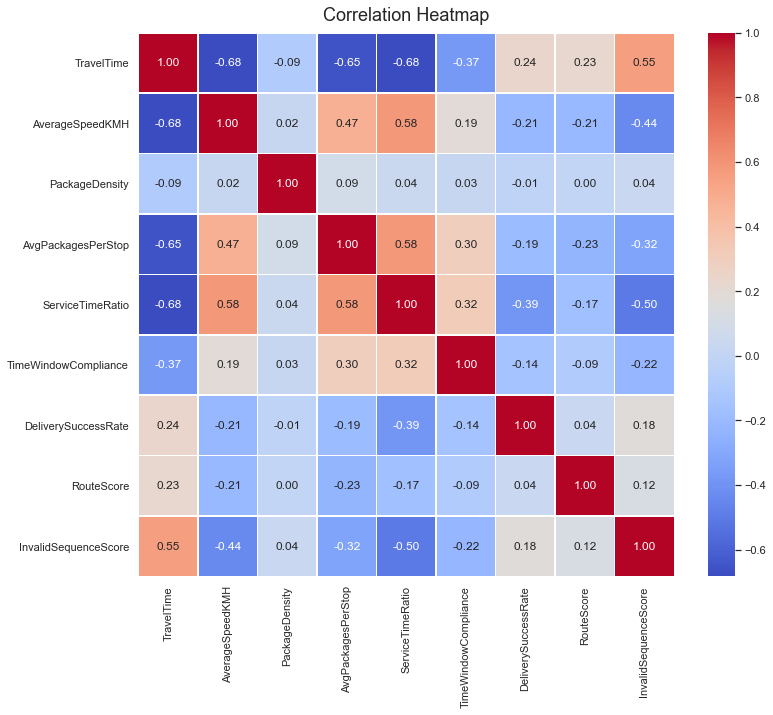

In [124]:
# Setting the drawing style
sns.set(style='white')

# Heat mapping
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

# Display heat maps
plt.show()


In [80]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"Linear Regression CV Scores: {lr_scores.mean()}")
# Assessment models
score = lr.score(X_test, y_test)
print(f"Model Scoring: {score}")
# Access to forecast results
predictions = lr.predict(X_test)

Linear Regression CV Scores: 1.0
模型评分: 1.0


In [99]:
# Use 10 fold cross validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='r2')
print("Linear Regression 10-Fold CV Scores:", cv_scores.mean())

Linear Regression 10-Fold CV Scores: 1.0


In [83]:
# Linear regression model assessment
y_pred_lr = lr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_lr)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_lr)}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Linear Regression R2: {r2_score(y_test, y_pred_lr)}")

Mean Absolute Error (MAE): 2.3444603232775914e-16
Mean Squared Error (MSE): 6.156419464781666e-32
Root Mean Squared Error (RMSE): 2.481213304974336e-16
Linear Regression R2: 1.0


In [102]:
# Training models
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Assessment models
score = model.score(X_test, y_test)
print(f"Model Scoring: {score}")
# Access to forecast results
predictions = model.predict(X_test)

模型评分: 0.851461525760941


In [103]:
#RandomForestRegressor
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.0011856756343059153
Mean Squared Error (MSE): 7.674966502591093e-05
Root Mean Squared Error (RMSE): 0.008760688615965696
R² Score: 0.851461525760941


In [104]:
# 使用10折交叉验证
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
print("Linear Regression 10-Fold CV Scores:", cv_scores.mean())

Linear Regression 10-Fold CV Scores: 0.9849689813760417


In [107]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate and train gradient boosting regression models
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
# Evaluate gradient boosting regression models
y_pred_gbr = gbr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_gbr, squared=False)
print(f"Gradient Boosting Regression MAE: {mean_absolute_error(y_test, y_pred_gbr)}")
print(f"Gradient Boosting Regression MSE: {mean_squared_error(y_test, y_pred_gbr)}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Gradient Boosting Regression R2: {r2_score(y_test, y_pred_gbr)}")
# Use 10 fold cross validation
cv_scores = cross_val_score(gbr, X_train, y_train, cv=10, scoring='r2')
print("Gradient Boosting Regression 10-Fold CV Scores:", cv_scores.mean())

Gradient Boosting Regression MAE: 0.0010183220312484978
Gradient Boosting Regression MSE: 6.217086106393738e-05
Root Mean Squared Error (RMSE): 0.007884850097746778
Gradient Boosting Regression R2: 0.8796768058668648
Gradient Boosting Regression 10-Fold CV Scores: 0.9880552553747641


In [110]:
# Define the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Instantiate Ridge regression
ridge = Ridge()
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='r2')
grid_search_ridge.fit(X_train, y_train)

print("Best parameters for Ridge:", grid_search_ridge.best_params_)
print("Best Ridge R2 score:", grid_search_ridge.best_score_)
cv_scores = cross_val_score(ridge, X_train, y_train, cv=10, scoring='r2')
print("Best Ridge 10-Fold CV Scores:", cv_scores.mean())

# Instantiate Lasso regression
lasso = Lasso()
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='r2')
grid_search_lasso.fit(X_train, y_train)

print("Best parameters for Lasso:", grid_search_lasso.best_params_)
print("Best Lasso R2 score:", grid_search_lasso.best_score_)
cv_scores = cross_val_score(lasso, X_train, y_train, cv=10, scoring='r2')
print("Best parameters for Lasso 10-Fold CV Scores:", cv_scores.mean())

Best parameters for Ridge: {'alpha': 0.1}
Best Ridge R2 score: 0.9988558984582079
Best Ridge 10-Fold CV Scores: 0.946577406685799
Best parameters for Lasso: {'alpha': 0.1}
Best Lasso R2 score: -0.014589702671159
Best parameters for Lasso 10-Fold CV Scores: -0.012793712530257096


In [87]:
# Best Ridge model
best_ridge = grid_search_ridge.best_estimator_
ridge_scores = cross_val_score(best_ridge, X_train, y_train, cv=5, scoring='r2')

print("Ridge Regression CV Scores:", ridge_scores.mean())

# Best Lasso model
best_lasso = grid_search_lasso.best_estimator_
lasso_scores = cross_val_score(best_lasso, X_train, y_train, cv=5, scoring='r2')

print("Lasso Regression CV Scores:", lasso_scores.mean())

Ridge Regression CV Scores: 0.9988558984582079
Lasso Regression CV Scores: -0.014589702671159


In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the best Ridge model
y_pred_ridge = best_ridge.predict(X_test)
print(f"Ridge Regression MAE: {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"Ridge Regression MSE: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"Ridge Regression R2: {r2_score(y_test, y_pred_ridge)}")

# Evaluate the best Lasso model
y_pred_lasso = best_lasso.predict(X_test)
print(f"Lasso Regression MAE: {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"Lasso Regression MSE: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"Lasso Regression R2: {r2_score(y_test, y_pred_lasso)}")

Ridge Regression MAE: 0.0002968044775723922
Ridge Regression MSE: 3.7829172259742397e-07
Ridge Regression R2: 0.9992678681363245
Lasso Regression MAE: 0.011022058927745463
Lasso Regression MSE: 0.0005271945228779839
Lasso Regression R2: -0.020312857770091064


In [91]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Define the base model
estimators = [
    ('ridge', Ridge(alpha=grid_search_ridge.best_params_['alpha'])),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Define the portfolio model
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

# Training combinatorial models
stacking_regressor.fit(X_train, y_train)

# Evaluating Portfolio Models
y_pred_stack = stacking_regressor.predict(X_test)
print(f"Stacking Regressor MAE: {mean_absolute_error(y_test, y_pred_stack)}")
print(f"Stacking Regressor MSE: {mean_squared_error(y_test, y_pred_stack)}")
print(f"Stacking Regressor R2: {r2_score(y_test, y_pred_stack)}")

# Use 10 fold cross validation
cv_scores_stack = cross_val_score(stacking_regressor, X_train, y_train, cv=10, scoring='r2')
print("Stacking Regressor 10-Fold CV Scores:", cv_scores_stack.mean())


Stacking Regressor MAE: 0.00010276633455276375
Stacking Regressor MSE: 3.048837929517513e-08
Stacking Regressor R2: 0.9999409939139018
Stacking Regressor 10-Fold CV Scores: 0.9975796838140158


TSP

In [1]:
!pip install tensorflow

ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\thinkpad\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "c:\users\thinkpad\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "c:\users\thinkpad\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\thinkpad\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\thinkpad\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\thinkpad\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "c:\users\thinkpad\anacon

In [44]:
pip install geneticalgorithm

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15077 sha256=995b2b2c1e3ce9c7b644a965d50dc7d368d3138329ccfbd715459b3dffd893ea
  Stored in directory: c:\users\thinkpad\appdata\local\pip\cache\wheels\a8\92\ca\5bbab358275e310af23b73fc32ebf37d6a7a08c87c8d2cdbc1
Successfully built func-timeout
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Thinkpad\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\Thinkpad\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\Thinkpad\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\Thinkpad\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\Thinkpad\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\Thinkpad\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "C:\Users\Thinkpad\anacon

In [1]:
import pyodbc
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [76]:
import random
import math
from geneticalgorithm import geneticalgorithm as ga
from scipy.sparse.csgraph import minimum_spanning_tree as mst
from keras.models import load_model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [3]:
# Construct distance matrix
def build_distance_matrix(route_data, unique_stops):
    stops = set()
    for record in route_data:
        stops.add(record['FromStopID'])
        stops.add(record['ToStopID'])
    
    stops = list(stops)
    n = len(stops)
    stop_index = {stop: idx for idx, stop in enumerate(stops)}
    
    distance_matrix = np.full((n, n), np.inf)
    for record in route_data:
        start_idx = stop_index[record['FromStopID']]
        end_idx = stop_index[record['ToStopID']]
        distance_matrix[start_idx][end_idx] = record['TravelTimeSeconds']
    
    return distance_matrix, stops, stop_index, stop_index[start_stop]

In [45]:
# Calculate the total distance of the route
def calculate_total_distance(route, distance_matrix):
    total_distance = sum(distance_matrix[route[i], route[i + 1]] for i in range(len(route) - 1))
    total_distance += distance_matrix[route[-1], route[0]]  # Return to the start point
    return total_distance

In [5]:
# Simulated annealing algorithm to solve TSP
def simulated_annealing_tsp(distance_matrix, initial_temp=10000, cooling_rate=0.995, iteration_limit=1000):
    n = len(distance_matrix)
    current_path = list(range(n))
    current_cost = calculate_total_distance(current_path, distance_matrix)
    best_path = current_path[:]
    best_cost = current_cost
    
    temperature = initial_temp
    
    while temperature > 1 and iteration_limit > 0:
        iteration_limit -= 1
        # Randomly swap two nodes in a path
        new_path = current_path[:]
        i, j = random.sample(range(n), 2)
        new_path[i], new_path[j] = new_path[j], new_path[i]
        
        new_cost = calculate_total_distance(new_path, distance_matrix)
        
        # Acceptance of new solutions
        if new_cost < current_cost or random.uniform(0, 1) < np.exp((current_cost - new_cost) / temperature):
            current_path = new_path
            current_cost = new_cost
        
        # Update the optimal solution
        if new_cost < best_cost:
            best_path = new_path
            best_cost = new_cost
        
        temperature *= cooling_rate
    
    return best_path, best_cost

In [46]:
# Genetic algorithms to solve TSP
def genetic_algorithm_tsp(distance_matrix, population_size=100, generations=500, mutation_rate=0.01):
    n = len(distance_matrix)
    population = [random.sample(range(n), n) for _ in range(population_size)]
    
    def fitness(route):
        total_distance = calculate_total_distance(route, distance_matrix)
        if total_distance == 0:
            return float('inf')
        return 1 / total_distance
    
    def selection(population, fitness_scores):
        fitness_scores = np.nan_to_num(fitness_scores)  # Convert NaN to 0
        if np.sum(fitness_scores) == 0:
            fitness_scores = np.ones_like(fitness_scores)  # If adaptation is all 0s, set to all 1s
        probabilities = fitness_scores / np.sum(fitness_scores)
        probabilities = probabilities / np.sum(probabilities)  # Normalised again
        indices = np.random.choice(range(population_size), size=population_size, p=probabilities)
        return [population[i] for i in indices]
    
    def crossover(parent1, parent2):
        start, end = sorted(random.sample(range(n), 2))
        child = [None] * n
        child[start:end] = parent1[start:end]
        pointer = end
        for gene in parent2:
            if gene not in child:
                if pointer >= n:
                    pointer = 0
                child[pointer] = gene
                pointer += 1
        return child
    
    def mutate(route):
        if random.random() < mutation_rate:
            i, j = random.sample(range(n), 2)
            route[i], route[j] = route[j], route[i]
    
    for generation in range(generations):
        fitness_scores = np.array([fitness(individual) for individual in population])
        population = selection(population, fitness_scores)
        next_population = []
        for i in range(0, population_size, 2):
            parent1, parent2 = population[i], population[i + 1]
            child1, child2 = crossover(parent1, parent2), crossover(parent2, parent1)
            mutate(child1)
            mutate(child2)
            next_population.extend([child1, child2])
        population = next_population
    
    best_individual = min(population, key=lambda ind: calculate_total_distance(ind, distance_matrix))
    return best_individual, calculate_total_distance(best_individual, distance_matrix)

In [7]:
def minimum_spanning_tree_tsp(distance_matrix):
    mst_matrix = mst(distance_matrix, overwrite=True).toarray()
    mst_matrix[mst_matrix == 0] = np.inf
    path = [0]
    visited = set(path)
    while len(visited) < len(distance_matrix):
        min_dist = np.inf
        next_node = None
        for current in path:
            for neighbor, dist in enumerate(mst_matrix[current]):
                if neighbor not in visited and dist < min_dist:
                    min_dist = dist
                    next_node = neighbor
        path.append(next_node)
        visited.add(next_node)
    path.append(0)  # Return to start
    total_cost = sum(distance_matrix[path[i], path[i+1]] for i in range(len(path) - 1))
    return path, total_cost

In [8]:
# Connect to SQL Server
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=LAPTOP-Q5CNA3P4\SQLEXPRESS;DATABASE=LogisticsData;Trusted_Connection=yes;')
cursor = conn.cursor()

In [9]:
route_id = 'RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77'

In [10]:
query = f"""
SELECT FromStopID, ToStopID, TravelTimeSeconds, DistanceKM
FROM TravelDistances
WHERE RouteID = '{route_id}'
"""
cursor.execute(query)
rows = cursor.fetchall()

In [ ]:
query = f"""
SELECT FromStopID, ToStopID, TravelTimeSeconds, DistanceKM
FROM TravelDistances
"""
cursor.execute(query)
rows = cursor.fetchall()

In [11]:
# Obtain actual transport sequence data
query_actual = f"""
SELECT StopID, TravelTimeSeconds
FROM actual_sequences_data
WHERE RouteID = '{route_id}'
"""
cursor.execute(query_actual)
rows_actual = cursor.fetchall()

In [17]:
# Obtain actual transport sequence data
query_actual = f"""
SELECT StopID, TravelTimeSeconds
FROM actual_sequences_data
"""
cursor.execute(query_actual)
rows_actual = cursor.fetchall()

In [12]:
# Get all StopIDs and corresponding codes
query_unique_stops = "SELECT AutoID, StopID FROM UniqueStops"
cursor.execute(query_unique_stops)
rows_unique_stops = cursor.fetchall()

In [13]:
# Close the connection
cursor.close()
conn.close()

In [14]:
# Processing data
route_data = [{'FromStopID': row[0], 'ToStopID': row[1], 'TravelTimeSeconds': row[2], 'DistanceKM': row[3]} for row in rows]
actual_data = [{'StopID': row[0], 'TravelTimeSeconds': row[1]} for row in rows_actual]
unique_stops = {row[1]: row[0] for row in rows_unique_stops}

In [15]:
route_data_df=pd.DataFrame(route_data)
actual_data_df=pd.DataFrame(actual_data)
#unique_stops_df=pd.DataFrame(unique_stops)

In [16]:
unique_stops

{'AA': 1,
 'AB': 2,
 'AC': 3,
 'AD': 4,
 'AE': 5,
 'AF': 6,
 'AG': 7,
 'AH': 8,
 'AI': 9,
 'AJ': 10,
 'AK': 11,
 'AL': 12,
 'AM': 13,
 'AN': 14,
 'AO': 15,
 'AP': 16,
 'AQ': 17,
 'AR': 18,
 'AS': 19,
 'AT': 20,
 'AU': 21,
 'AV': 22,
 'AW': 23,
 'AX': 24,
 'AY': 25,
 'AZ': 26,
 'BA': 27,
 'BB': 28,
 'BC': 29,
 'BD': 30,
 'BE': 31,
 'BF': 32,
 'BG': 33,
 'BH': 34,
 'BI': 35,
 'BJ': 36,
 'BK': 37,
 'BL': 38,
 'BM': 39,
 'BN': 40,
 'BO': 41,
 'BP': 42,
 'BQ': 43,
 'BR': 44,
 'BS': 45,
 'BT': 46,
 'BU': 47,
 'BV': 48,
 'BW': 49,
 'BX': 50,
 'BY': 51,
 'BZ': 52,
 'CA': 53,
 'CB': 54,
 'CC': 55,
 'CD': 56,
 'CE': 57,
 'CF': 58,
 'CG': 59,
 'CH': 60,
 'CI': 61,
 'CJ': 62,
 'CK': 63,
 'CL': 64,
 'CM': 65,
 'CN': 66,
 'CO': 67,
 'CP': 68,
 'CQ': 69,
 'CR': 70,
 'CS': 71,
 'CT': 72,
 'CU': 73,
 'CV': 74,
 'CW': 75,
 'CX': 76,
 'CY': 77,
 'CZ': 78,
 'DA': 79,
 'DB': 80,
 'DC': 81,
 'DD': 82,
 'DE': 83,
 'DF': 84,
 'DG': 85,
 'DH': 86,
 'DI': 87,
 'DJ': 88,
 'DK': 89,
 'DL': 90,
 'DM': 91,
 'DN': 9

In [18]:
route_data_df.to_csv('route_data_df.csv', index=False)
actual_data_df.to_csv('actual_data_df.csv', index=False)
#unique_stops_df.to_csv('unique_stops_df.csv', index=False)
print("Data has been successfully exported")

Data has been successfully exported


In [19]:
features = route_data_df.drop(columns=['TravelTimeSeconds'])
target = route_data_df['TravelTimeSeconds']

In [20]:
# Find the start point (the point where TravelTimeSeconds and DistanceKM are 0)
start_stop = next(record['FromStopID'] for record in route_data if record['TravelTimeSeconds'] == 0 and record['DistanceKM'] == 0)

In [21]:
distance_matrix, stops, stop_index, start_index = build_distance_matrix(route_data, unique_stops)

In [22]:
# Processing actual path data for indexing
def process_actual_data(actual_data, unique_stops, stop_index):
    actual_path = [stop_index[unique_stops[stop['StopID']]] for stop in actual_data if stop['StopID'] in unique_stops]
    return actual_path

In [74]:
# Get an indexed representation of the actual path
actual_path_indices = process_actual_data(actual_data, unique_stops, stop_index)
print(f"Actual Path Indices: {actual_path_indices}")  # Add printing to check the actual path index
if not actual_path_indices:
    print("Error: Actual path indices is empty.")

Actual Path Indices: [0, 1, 2, 8, 11, 13, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 35, 36, 37, 38, 40, 44, 45, 47, 49, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 3, 4, 5, 6, 7, 9, 10, 12, 14, 15, 16, 22, 28, 30, 32, 34, 39, 41, 42, 43, 46, 48, 50, 51, 52, 55]


In [24]:
actual_cost = calculate_total_distance(actual_path_indices, distance_matrix)
print(actual_cost)

28214.900000000012


In [77]:
# Define and train deep neural network models
X = pd.DataFrame(route_data).drop(['TravelTimeSeconds'], axis=1)
y = pd.DataFrame(route_data)['TravelTimeSeconds']

# Tag encoding
label_encoder = LabelEncoder()
X['FromStopID'] = label_encoder.fit_transform(X['FromStopID'])
X['ToStopID'] = label_encoder.fit_transform(X['ToStopID'])

# Standardised features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_temp, y_train, y_temp= train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Define the deep neural network structure
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# Compilation model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mean_squared_error'])

# Define callback functions
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Training models
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

# Predict and evaluate model performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# Save the model
model.save('logistics_dnn_model.h5')


Epoch 1/150
310/310 [==============================] - 1s 2ms/step - loss: 67757.3516 - mean_squared_error: 67757.3516 - val_loss: 46010.5625 - val_mean_squared_error: 46010.5625
Epoch 2/150
310/310 [==============================] - 1s 2ms/step - loss: 48635.8789 - mean_squared_error: 48635.8789 - val_loss: 45389.0664 - val_mean_squared_error: 45389.0664
Epoch 3/150
310/310 [==============================] - 1s 2ms/step - loss: 48551.8281 - mean_squared_error: 48551.8281 - val_loss: 45054.7852 - val_mean_squared_error: 45054.7852
Epoch 4/150
310/310 [==============================] - 1s 2ms/step - loss: 47127.8867 - mean_squared_error: 47127.8867 - val_loss: 45438.4219 - val_mean_squared_error: 45438.4219
Epoch 5/150
310/310 [==============================] - 1s 2ms/step - loss: 48685.4648 - mean_squared_error: 48685.4648 - val_loss: 44911.0703 - val_mean_squared_error: 44911.0703
Epoch 6/150
310/310 [==============================] - 1s 2ms/step - loss: 48463.8086 - mean_squared_erro

In [26]:
# Solve the problem with a genetic algorithm 
# Place the start point at the beginning of the path
def adjust_path(path, start_index):
    start_pos = path.index(start_index)
    return path[start_pos:] + path[:start_pos]

# Resolve TSP issues
path_indices, model_cost = genetic_algorithm_tsp(distance_matrix)
path_indices = adjust_path(path_indices, start_index)
optimal_path = [stops[i] for i in path_indices]

print(f"Optimal Path (Genetic Algorithm): {optimal_path}")
print(f"Total Cost (Model): {model_cost}")
print(f"Total Cost (Actual): {actual_cost}")
print(f"Difference in Cost: {model_cost - actual_cost}")

Optimal Path (Genetic Algorithm): [4, 288, 189, 335, 534, 46, 281, 112, 129, 197, 88, 642, 51, 471, 196, 502, 511, 170, 410, 629, 472, 290, 90, 359, 297, 649, 529, 119, 273, 541, 477, 539, 7, 350, 440, 582, 31, 547, 138, 313, 158, 467, 485, 63, 569, 6, 261, 68, 27, 421, 474, 671, 179, 242, 155, 247, 666, 231, 327, 519, 505, 75, 107, 276, 543, 53, 443, 92, 330, 530, 128, 392, 356, 33, 311, 52, 414, 634, 600, 501, 429, 638, 602, 351, 497, 200, 431, 549, 343, 59, 184, 652, 224, 172, 409, 400, 209, 267, 218, 221, 136, 591, 329, 551, 293, 177, 274, 65, 632, 655, 95, 270, 202, 449, 175, 538, 205, 67, 42]
Total Cost (Model): 25597.300000000014
Total Cost (Actual): 28214.900000000012
Difference in Cost: -2617.5999999999985


In [27]:
# Setting the simulated annealing parameters
initial_temp = 10000
cooling_rate = 0.995


In [28]:
# Annealing to solve TSP problems
path_indices, model_cost = simulated_annealing_tsp(distance_matrix)
path_indices = adjust_path(path_indices, start_index)
optimal_path = [stops[i] for i in path_indices]

print(f"Optimal Path (Simulated Annealing): {optimal_path}")
print(f"Total Cost (Simulated Annealing): {model_cost}")
print(f"Total Cost (Actual): {actual_cost}")
print(f"Difference in Cost: {model_cost - actual_cost}")

Optimal Path (Simulated Annealing): [4, 666, 634, 440, 67, 429, 242, 297, 421, 189, 638, 652, 6, 46, 410, 474, 112, 600, 274, 177, 529, 197, 671, 549, 472, 534, 477, 224, 65, 138, 359, 449, 485, 172, 218, 311, 329, 247, 409, 42, 119, 267, 200, 649, 530, 270, 392, 273, 539, 350, 95, 356, 202, 551, 205, 330, 505, 155, 569, 327, 196, 75, 642, 602, 129, 519, 128, 136, 209, 7, 276, 632, 547, 53, 582, 497, 655, 51, 511, 261, 170, 88, 351, 591, 467, 52, 313, 288, 443, 107, 541, 184, 538, 293, 343, 90, 221, 179, 158, 63, 629, 68, 290, 335, 471, 281, 175, 31, 33, 92, 543, 27, 59, 414, 231, 502, 431, 501, 400]
Total Cost (Simulated Annealing): 22096.499999999996
Total Cost (Actual): 28214.900000000012
Difference in Cost: -6118.400000000016


In [ ]:
print(f"Optimal Path (DNN + MST): {mst_optimal_path}")
print(f"Total Cost (DNN + MST): {mst_cost}")
print(f"Optimal Path (DNN + GA): {ga_optimal_path}")
print(f"Total Cost (DNN + GA): {ga_cost}")
print(f"Total Cost (Actual): {actual_cost}")
print(f"Difference in Cost (DNN + MST): {mst_cost - actual_cost}")
print(f"Difference in Cost (DNN + GA): {ga_cost - actual_cost}")

In [78]:
# Load the trained neural network model
model = load_model('logistics_dnn_model.h5')

In [79]:
# Data processing
X = route_data_df.drop(['TravelTimeSeconds'], axis=1)
label_encoder = LabelEncoder()
X['FromStopID'] = label_encoder.fit_transform(X['FromStopID'])
X['ToStopID'] = label_encoder.fit_transform(X['ToStopID'])
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [80]:
# Predicted travel time
predicted_times = model.predict(X)

443/443 [==============================] - 0s 836us/step


In [81]:
# Construct distance matrix for prediction
num_stops = len(unique_stops)
distance_matrix = np.zeros((num_stops, num_stops))
for index, row in route_data_df.iterrows():
    from_stop = str(row['FromStopID'])
    to_stop = str(row['ToStopID'])
    if from_stop in unique_stops and to_stop in unique_stops:
        from_index = unique_stops[from_stop]
        to_index = unique_stops[to_stop]
        distance_matrix[from_index][to_index] = predicted_times[index]


In [82]:
# Check and correct invalid values in the distance matrix
distance_matrix[np.isnan(distance_matrix)] = np.inf
distance_matrix[distance_matrix == 0] = np.inf
distance_matrix

array([[inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf]])

In [83]:
# Apply Minimum Spanning Tree (MST) and Genetic Algorithm (GA) to solve TSP problems
from scipy.sparse.csgraph import minimum_spanning_tree
mst_matrix = minimum_spanning_tree(distance_matrix).toarray()

In [84]:
# Define the function that adjusts the path
def adjust_path(path, start_index):
    start_pos = path.index(start_index)
    return path[start_pos:] + path[:start_pos]


In [85]:
# Adaptation function
def fitness(path):
    total_cost = 0
    for i in range(len(path) - 1):
        total_cost += distance_matrix[path[i], path[i + 1]]
    total_cost += distance_matrix[path[-1], path[0]]  # 返回起点
    return 1 / total_cost if total_cost > 0 else 0

In [87]:
# Assess the quality of pathways
def calculate_total_distance(path_indices, distance_matrix):
    total_distance = 0
    for i in range(len(path_indices) - 1):
        total_distance += distance_matrix[path_indices[i], path_indices[i+1]]
    return total_distance

In [88]:
actual_path_indices = process_actual_data(actual_data, unique_stops, stop_index)
actual_cost = calculate_total_distance(actual_path_indices, distance_matrix)

print(f"Optimal Path (Genetic Algorithm): {optimal_path}")
print(f"Total Cost (Model): {model_cost}")
print(f"Total Cost (Actual): {actual_cost}")
print(f"Difference in Cost: {model_cost - actual_cost}")

# Save results to CSV
results = pd.DataFrame({
    'Optimal Path': [optimal_path],
    'Model Cost': [model_cost],
    'Actual Cost': [actual_cost],
    'Difference in Cost': [model_cost - actual_cost]
})
results.to_csv('tsp_results.csv', index=False)

Optimal Path (Genetic Algorithm): [4, 666, 634, 440, 67, 429, 242, 297, 421, 189, 638, 652, 6, 46, 410, 474, 112, 600, 274, 177, 529, 197, 671, 549, 472, 534, 477, 224, 65, 138, 359, 449, 485, 172, 218, 311, 329, 247, 409, 42, 119, 267, 200, 649, 530, 270, 392, 273, 539, 350, 95, 356, 202, 551, 205, 330, 505, 155, 569, 327, 196, 75, 642, 602, 129, 519, 128, 136, 209, 7, 276, 632, 547, 53, 582, 497, 655, 51, 511, 261, 170, 88, 351, 591, 467, 52, 313, 288, 443, 107, 541, 184, 538, 293, 343, 90, 221, 179, 158, 63, 629, 68, 290, 335, 471, 281, 175, 31, 33, 92, 543, 27, 59, 414, 231, 502, 431, 501, 400]
Total Cost (Model): 22096.499999999996
Total Cost (Actual): inf
Difference in Cost: -inf
